# Setup


Google’s updated their Colab instances to use TensorFlow 2.X by default. The last stable version of the Signaturizers is still on TensorFlow 1.X.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Install RDKit

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-07-13 13:03:01--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-07-13 13:03:02--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  84.75M   160MB/s    in 0.5s    

2020-07-13 13:03:02 (160 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Install the **signaturizer** package

In [ ]:
!pip install signaturizer

     |████████████████████████████████| 101 kB 2.9 MB/s 
     |████████████████████████████████| 2.9 MB 6.8 MB/s 
     |████████████████████████████████| 104 kB 26.4 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 1.3 MB 20.2 MB/s 
     |████████████████████████████████| 3.0 MB 41.6 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 57 kB 4.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 88 kB 8.3 MB/s 
     |████████████████████████████████| 298 kB 56.0 MB/s 
  Created wheel for signaturizer: filename=signaturizer-1.1.0-py3-none-any.whl size=10681 sha256=3b8632e0ab07e4ebb642a7c0ea1386ea678a87992832c18df33cb7ed67f77813
  Stored in directory: /root/.cache/pip/wheels/a1/9c/f4/ba4302b407a0d9a128ba6f7ac4e3f7f6506e4aeb9aad0b6ba8
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=765effbddd6252c

# Basic usage

## Generating Bioactivity Signatures

In [ ]:
from signaturizer import Signaturizer
# load the predictor for B1 space (representing the Mode of Action)
sign = Signaturizer('B1')
# prepare a list of SMILES strings
smiles = ['C', 'CCC']
# run prediction
results = sign.predict(smiles)

  0%|          | 0/1 [00:00<?, ?it/s]

LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B1


100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

PREDICTION complete!


In [ ]:
print(results.signature.shape)

(2, 128)


In [ ]:
print(results.signature)

[[-0.14229846  0.079988   -0.0108407   0.16682942 -0.14715977  0.0345403
  -0.04940525 -0.0299123  -0.02812521  0.04851754 -0.0751914  -0.15773815
   0.17171657 -0.0402149   0.05731795  0.01840392 -0.11413906  0.15063329
   0.02016284  0.02207784 -0.11493312  0.00099877  0.05556487 -0.06619342
   0.01336694  0.01084529 -0.00307423 -0.10399567 -0.13550924 -0.11824676
   0.00908166 -0.12131458  0.00374519  0.03948187 -0.0170527  -0.15320577
  -0.11677633  0.02146511 -0.1542775  -0.06272464 -0.08233681 -0.08792384
  -0.10899878 -0.06019147 -0.04026137 -0.07017165 -0.00706073 -0.05537233
   0.13329253  0.05971988  0.18887898 -0.14046773 -0.10550749 -0.07616345
   0.09923495 -0.06871163  0.13480408 -0.10783799 -0.01686241 -0.02682001
   0.13261575  0.1491388   0.11526254 -0.12688403 -0.0676789  -0.12894797
   0.1341134  -0.11524991 -0.05405083 -0.12864871  0.05762549  0.00823569
   0.03940435 -0.00629326  0.02878091  0.07341221 -0.07642188 -0.01696387
  -0.02422101  0.03026091  0.10609307 -

## Generating multiple Signatures in one batch

Loaded models are cached locally, so that the model download (takes time) is happening only once

In [ ]:
sign = Signaturizer(['B1', 'E4', 'A5', 'D3'])
# prepare a list of SMILES strings
smiles = ['C', 'CCC']
# run prediction
results = sign.predict(smiles)
print(results.signature.shape)

LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B1
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/E4
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A5
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/D3


100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

PREDICTION complete!
(2, 512)


## Generating Global Bioactivity Signatures

In [ ]:
sign = Signaturizer('GLOBAL')
# prepare a list of SMILES strings
smiles = ['C', 'CCC']
# run prediction
results = sign.predict(smiles)
print(results.signature.shape)

LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A1
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A2
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A3
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A4
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/A5
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B1
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B2
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B3
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B4
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/B5
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/C1
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/C2
LOADING remote: http://chemicalchecker.com/api/db/getSignaturizer/v1/C3
LOADING remote: http://chemicalchecker.com/api/db/getSignaturize

100%|██████████| 1/1 [00:18<00:00, 18.85s/it]

PREDICTION complete!
(2, 3200)


## Saving results to h5

When signatures for a lot of molecules are desired, it is better to save them to disk, avoiding consuming all system memory.

In [ ]:
results = sign.predict(smiles, 'destination.h5')

100%|██████████| 1/1 [00:29<00:00, 29.06s/it]

PREDICTION complete!


In [ ]:
import h5py
with h5py.File('destination.h5', 'r') as fh:
  signatures = fh['signature'][:]
print(signatures.shape)

(2, 3200)


## Applicability predictions

WIP!! The applicability score help identifying molecules for which the signature prediction is extremely accurate

# Usage example

In [ ]:
!wget http://gitlabsbnb.irbbarcelona.org/packages/signaturizer/raw/master/notebook/foodb_repr.csv

--2020-07-13 15:38:56--  http://gitlabsbnb.irbbarcelona.org/packages/signaturizer/raw/master/notebook/foodb_repr.csv
Resolving gitlabsbnb.irbbarcelona.org (gitlabsbnb.irbbarcelona.org)... 161.116.222.71
Connecting to gitlabsbnb.irbbarcelona.org (gitlabsbnb.irbbarcelona.org)|161.116.222.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5535132 (5.3M) [text/plain]
Saving to: ‘foodb_repr.csv’

foodb_repr.csv      100%[===================>]   5.28M  1.94MB/s    in 2.7s    

2020-07-13 15:39:00 (1.94 MB/s) - ‘foodb_repr.csv’ saved [5535132/5535132]



## Data source
In this notebook we will analize a representative subset of the [FooDB](https://foodb.ca/) compound library exploiting the Chemical Checker signatures generated _via_ our Signaturizers. Let's first inspect the  data:

In [ ]:
import pandas as pd
df = pd.read_csv('./foodb_repr.csv')
df

,InChIKey,SMILES,food_name,food_subgroup,food_group
0,AAARRLVSWMMLIL-JFDCHTIYSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods
1,AAAUQAJYMBAEDN-SDYYSCIWSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods
2,AAAVAOYFDZROJH-ODEQYEIHSA-N,CCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCCCC...,Bison,Bovines,Animal foods
3,AAAYFFAGXKLUDV-AXAMJWTMSA-N,CC(C)CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COC(=O)CCCC...,Bison,Bovines,Animal foods
4,AABORWYRSOFPIQ-NTOMMRJQSA-N,CCCCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCC...,Bison,Bovines,Animal foods
...,...,...,...,...,...
47949,IKGXIBQEEMLURG-NVPNHPEKSA-N,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)...,Berry wine,Fermented beverages,Beverages
47950,IKGXIBQEEMLURG-NVPNHPEKSA-N,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)...,Berry wine,Fermented beverages,Beverages
47951,OXGUCUVFOIWWQJ-HQBVPOQASA-N,C[C@@H]1O[C@@H](Oc2c(-c3ccc(O)c(O)c3)oc3cc(O)c...,Berry wine,Fermented beverages,Beverages
47952,OXGUCUVFOIWWQJ-HQBVPOQASA-N,C[C@@H]1O[C@@H](Oc2c(-c3ccc(O)c(O)c3)oc3cc(O)c...,Berry wine,Fermented beverages,Beverages


We have different column in this file, the most importand for our task is the **SMILES** columns. The SMILES format is a representation of the chemical structure of a compound which is our starting point.

In [ ]:
df.nunique()

InChIKey         6325
SMILES           6325
food_name         461
food_subgroup      57
food_group         17
dtype: int64

Comparing the total number of rows (47954) to the number of unique entries (6325) we realize that molecules are repeated, and indeed different food can contain repeated compounds. For this reason we'll use a non redundant set of SMILES.

In [ ]:
smiles = df.SMILES.unique()

## Signatures
Signatures are numerical representation of molecules. Having molecules represented as vector is needed if we want to do any quantitative analysis of our library (e.g. comparison, clustering, visualization ...). The advantage of using a signaturizer with respect to standard chemical representation (e.g. morgan fingerprint) is that we can leverage on the wealth of public bioactivity data that goes beyond chemical information.

In the Chemical Checker we defined 25 bioactivity spaces which capture multiple aspect of a molecule. The stacked version of the signatures for these 25 spaces is what we call the _global_ signature, i.e. a general purpose entry point for our analisys.

In [ ]:
# load the global bioactivity signaturizer
from signaturizer import Signaturizer
sign = Signaturizer('B4', verbose=False)

For the sake of time we can just consider a random subsampling of these molecules.

In [ ]:
import numpy as np
np.random.seed(42)
subsample = np.random.choice(smiles, 1000, replace=False)
result = sign.predict(subsample)

In [ ]:
result.signature.shape

(1000, 128)

## Visualization
Only fantasy limits us in the way we can visualize the results generated.

In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
from matplotlib import gridspec, colors, colorbar, patches, lines
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We can plot the overall distribution of values for all generated signatures, and appreciate their bimodal distribution.

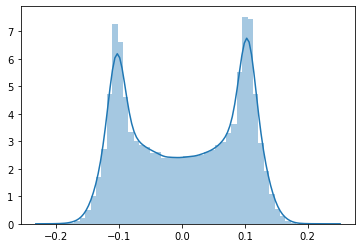

In [ ]:
sns.distplot(result.signature.ravel())

Or we can look at the raw matrix.

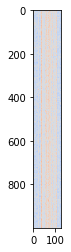

In [ ]:
plt.imshow(result.signature, cmap='coolwarm')

The signatures we generated have 3200 dimensions but looking at the raw data does not inform us on how similar/different are our molecules.

In Cheminformatics we often need a graphical representation of the chemical space covered by a set of molecules.  In this representation, similar molecules will be close and molecules that are different will be far apart.

We can use scikit-learn to create a lower bi-dimensional representation which will enable such visualization.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca_red = PCA(n_components=128).fit_transform(result.signature)
projection = TSNE(n_components=2).fit_transform(pca_red)

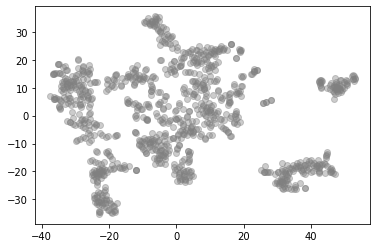

In [ ]:
plt.scatter(projection[:,0],projection[:,1], color='grey', alpha=.4)

Now we can appreciate the diversity of our molecules and also that they are 'organized' with some form of structure. We can annotate molecules with the food of origin to highlight this structure.

For example let's color all molecules coming from animal origin (i.e. meat):

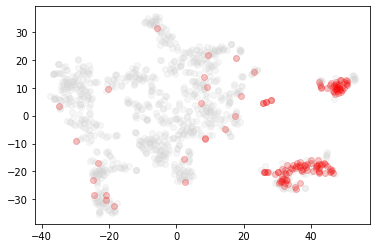

In [ ]:
cat_smiles = df[df.food_group == 'Animal foods'].SMILES.unique()
cat_mask = np.isin(subsample, cat_smiles)
plt.scatter(projection[:,0],projection[:,1], color='lightgrey', alpha=.2)
plt.scatter(projection[:,0][cat_mask],projection[:,1][cat_mask], color='red', alpha=0.2)

We clearly see that molecules from this food source are localized in two clusers of our bioactivity space.

If we go for compounds of vegetable orgin we can see, as expectable, that the two set of molecules do not overlap.

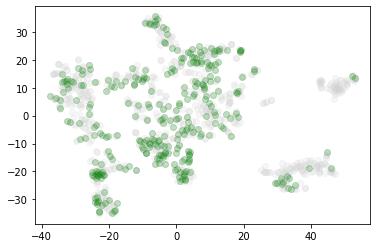

In [ ]:
cat_smiles = df[df.food_group == 'Vegetables'].SMILES.unique()
cat_mask = np.isin(subsample, cat_smiles)
plt.scatter(projection[:,0],projection[:,1], color='lightgrey', alpha=.2)
plt.scatter(projection[:,0][cat_mask],projection[:,1][cat_mask], color='green', alpha=0.2)